# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
# Import the titanic dataset here
import pandas as pd
import numpy as np
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [2]:
df_titanic["class"].unique()

array(['3rd', '2nd', '1st', 'engineering crew', 'victualling crew', 'restaurant staff', 'deck crew'],
      dtype=object)

In [3]:
# Code here
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew",
    "restaurant staff": "crew"
})
df_titanic
df_titanic_passengers = df_titanic[df_titanic["type"] == "passenger" ]
df_titanic_passengers
df_titanic_passengers.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,passenger


In [4]:
#passenger's class and where they embarked.
joint_ce = pd.crosstab(df_titanic_passengers["class"], df_titanic["embarked"], normalize = True )
joint_ce

embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
69%
* What proportion of Southampton passengers were in 3rd class?
54%

In [5]:
#the conditional distribution of where they embarked given their class
marginal_class = joint_ce.sum(axis = 1)
#calculates the sum of each row in the joint_ce table

#he conditional distribution of their class given where they embarked
#calculates the sum of each column in the joint_ce table
marginal_embarked = joint_ce.sum(axis = 0)

marginal_class
marginal_embarked

embarked
B    0.006834
C    0.205771
Q    0.093394
S    0.694002
dtype: float64

In [6]:
cond_class = joint_ce.div(marginal_class, axis = 0)
cond_embarked = joint_ce.div(marginal_embarked, axis = 1)

cond_class
cond_embarked

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.


The pros of using this visualization is that it did not require us to wrangle the data as much as the other option did. It makes it very easy to visually compare the differing classes ath the various ports. The flip sie of this is that we can only esimate based on this and we don't actually know any numbers. For example, At Southhampton we know about 50% of the 3rd class passengers got on at that port but we dont know exactly how these numbers all compare.

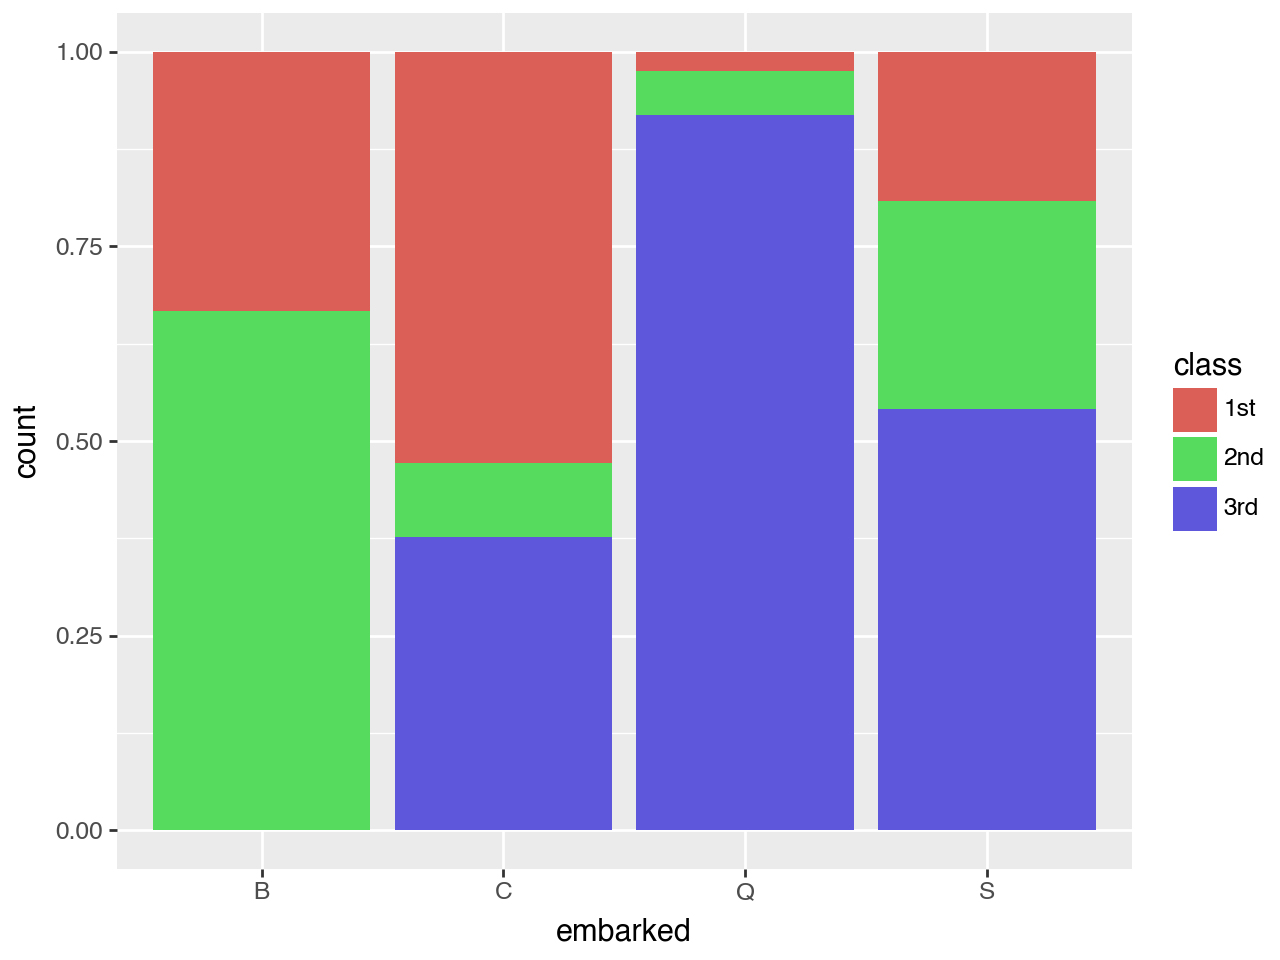

In [7]:
from plotnine import *
(ggplot(df_titanic_passengers, aes(x = "embarked", fill = "class"))
+ geom_bar(position = "fill"))